In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

2025-01-14 12:28:35.257822: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-14 12:28:35.274971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736832515.286475   21070 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736832515.289784   21070 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 12:28:35.301490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
# Read the uploaded CSV file
fake_news = pd.read_csv("FAKE-NEWS-DATA.csv")  # Use the name of your uploaded file
fake_news.head()

,Title,Text,Subject,Date,Link,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Radiation creates giant cannibal rats?,A serious radiation leak at the Hanford nuclea...,NaN,NaN,https://tienphong.vn/phong-xa-tao-ra-chuot-kho...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,People with special abilities,Mr. Truong Bao Thang in China can go through w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Strangely, the girl made objects catch fire",The 11-year-old girl in the A75 apartment comp...,NaN,NaN,https://giaoduc.net.vn/la-lung-co-be-lam-do-va...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Moon Hoax of 1835,Discover life and even civilization on the Moo...,NaN,NaN,https://vi.wikipedia.org/wiki/Tr%C3%B2_%C4%91%...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany's Corpse factory,"Germany has a ""Corpse Factory"" that processes ...",NaN,NaN,https://vi.wikipedia.org/wiki/Tr%C3%B2_%C4%91%...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
fake_news.columns

Index(['Title', 'Text', 'Subject', 'Date', 'Link', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

In [16]:
fake_news['Subject'].value_counts()

Subject
News                                                                                                                                          9046
politics                                                                                                                                      4894
 former U.S. Rep. Bob Inglis (R-SC) trashed his fellow GOPers for being so weak and  whimpering  when faced with Trump s numerous scandals       1
 also known as Obamacare                                                                                                                         1
 2016But sitting presidents have been campaigning for their party s nominee and potential successor for decades                                  1
 the Huffington Post interviewed Lexi                                                                                                            1
Name: count, dtype: int64

<Axes: xlabel='Subject', ylabel='count'>

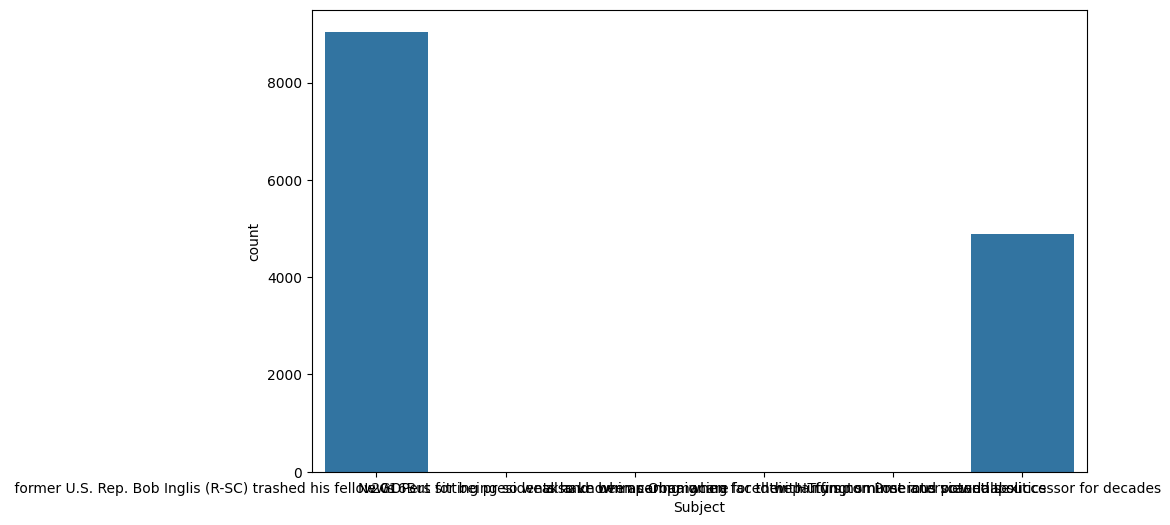

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Subject', data=fake_news) # Pass 'subject' as the 'x' argument

In [18]:
type(fake_news['Text'].tolist())

list

In [19]:
# Convert all elements in the 'Text' column to strings before joining
text = ' '.join([str(item) for item in fake_news['Text'].tolist()])

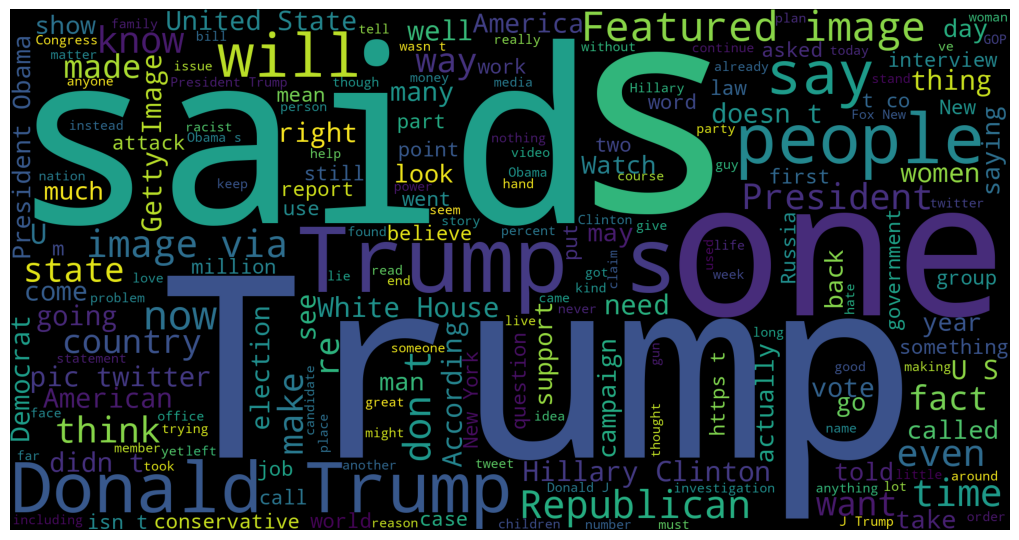

CPU times: user 9.44 s, sys: 456 ms, total: 9.9 s
Wall time: 9.7 s


In [20]:
%%time
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
# Read the uploaded CSV file
real_news = pd.read_csv("REAL-NEWS-DATA.csv")  # Use the name of your uploaded file
real_news.head()

,Title,Text,Subject,Date,Link
0,More than 100 businesses discuss 'Adaptive Lea...,"The event ""UEF Business Matching 2024"" connec...",News,"Monday, December 9, 2024",https://vietnamnet.vn/hon-100-doanh-nghiep-tha...
1,Genius Physics makes waves in world science,"\nDuong Duc, a PhD student at ETH Zurich, has ...",News,"Tuesday, December 10, 2024",https://vietnamnet.vn/thien-tai-vat-ly-lam-day...
2,VinFuture and the search for practical innovat...,The 2024 VinFuture Awards honor breakthroughs ...,News,"Monday, December 9, 2024",https://vietnamnet.vn/vinfuture-va-cong-cuoc-t...
3,New Year holiday schedule for 2025 of Hanoi st...,"According to the 2024-2025 school year plan, t...",News,"Saturday, December 7, 2024",https://vietnamnet.vn/lich-nghi-tet-duong-lich...
4,Ministry of Education: 'Tighten' early admissi...,A representative of the Ministry of Education ...,News,"Tuesday, November 26, 2024",https://vietnamnet.vn/bo-giao-duc-siet-xet-tuy...


In [22]:
text = ' '.join(real_news['Text'].tolist())

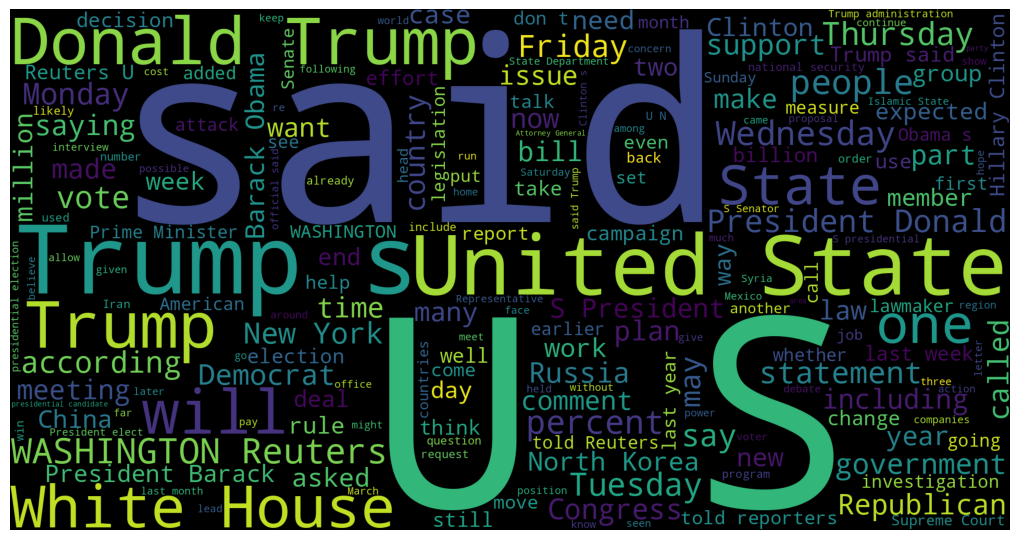

CPU times: user 9.68 s, sys: 512 ms, total: 10.2 s
Wall time: 9.95 s


In [23]:
%%time
wordcloud = WordCloud(width=1920, height=1000).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
real_news.sample(5)

,Title,Text,Subject,Date,Link
7205,Trump to unveil Supreme Court pick close to in...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"December 14, 2016",NaN
11423,Potential New Hampshire spoiler Kasich could p...,"MANCHESTER, N.H. (Reuters) - U.S. Republican p...",politicsNews,"February 8, 2016",NaN
7265,Tillerson choice raises questions of corporate...,WASHINGTON (Reuters) - The central question fa...,politicsNews,"December 11, 2016",NaN
2174,U.S. Senate confirms Trump's pick for top Supr...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"September 21, 2017",NaN
8739,U.S. Green Party's Stein investigated in North...,WASHINGTON (Reuters) - A sheriff’s department ...,politicsNews,"September 7, 2016",NaN


In [25]:
unknown_pubishers = []
for index, row in enumerate(real_news.Text.values):
    try:
        record = row.split(' - ', maxsplit=1)
        record[1]

        assert(len(record[0])<260)
    except:
        unknown_pubishers.append(index)

In [26]:
len(unknown_pubishers)

482

In [27]:
unknown_pubishers = []
for index, row in enumerate(real_news.Text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]

        assert(len(record[0])<120)
    except:
        unknown_pubishers.append(index)

In [28]:
len(unknown_pubishers)

621

In [29]:
real_news.iloc[unknown_pubishers].Text

0         The event "UEF Business Matching 2024" connec...
1        \nDuong Duc, a PhD student at ETH Zurich, has ...
4        A representative of the Ministry of Education ...
5        In 2025, many universities will adjust their a...
6        Vietnam Military History Museum attracted more...
                               ...                        
14511     (This version of the November 22nd story corr...
14994     (This story from November 16 corrects paragra...
15125     (This November 15 story was corrected to clar...
15387     (This November 1 story has been corrected to ...
15794     (This version of the November 8 story correct...
Name: Text, Length: 621, dtype: object

In [20]:
real_news.iloc[8970]

,8970
Title,Clinton leads Trump by five points in White Ho...
Text,NEW YORK (Reuters) - Democrat Hillary Clinton ...
Subject,politicsNews
Date,"August 12, 2016"
Link,NaN


In [30]:
real_news = real_news.drop(8970, axis=0)

In [31]:
publisher =[]
tmp_text = []

for index, row in enumerate(real_news.Text.values):
    if index in unknown_pubishers:
        tmp_text.append(row)
        publisher.append('Unknown')

    else:
        record = row.split('-', maxsplit=1)
        # Check if the split resulted in two elements
        if len(record) > 1:
            publisher.append(record[0].strip())
            tmp_text.append(record[1].strip())
        else:
            # Handle cases where there is no hyphen
            publisher.append('Unknown') # or any other appropriate value
            tmp_text.append(record[0].strip()) # or any other appropriate handling

In [32]:
real_news['publisher'] = publisher
real_news['text'] = tmp_text

In [33]:
real_news.head()

,Title,Text,Subject,Date,Link,publisher,text
0,More than 100 businesses discuss 'Adaptive Lea...,"The event ""UEF Business Matching 2024"" connec...",News,"Monday, December 9, 2024",https://vietnamnet.vn/hon-100-doanh-nghiep-tha...,Unknown,"The event ""UEF Business Matching 2024"" connec..."
1,Genius Physics makes waves in world science,"\nDuong Duc, a PhD student at ETH Zurich, has ...",News,"Tuesday, December 10, 2024",https://vietnamnet.vn/thien-tai-vat-ly-lam-day...,Unknown,"\nDuong Duc, a PhD student at ETH Zurich, has ..."
2,VinFuture and the search for practical innovat...,The 2024 VinFuture Awards honor breakthroughs ...,News,"Monday, December 9, 2024",https://vietnamnet.vn/vinfuture-va-cong-cuoc-t...,The 2024 VinFuture Awards honor breakthroughs ...,"T therapy and artificial intelligence, improvi..."
3,New Year holiday schedule for 2025 of Hanoi st...,"According to the 2024-2025 school year plan, t...",News,"Saturday, December 7, 2024",https://vietnamnet.vn/lich-nghi-tet-duong-lich...,According to the 2024,"2025 school year plan, the 2025 New Year holid..."
4,Ministry of Education: 'Tighten' early admissi...,A representative of the Ministry of Education ...,News,"Tuesday, November 26, 2024",https://vietnamnet.vn/bo-giao-duc-siet-xet-tuy...,Unknown,A representative of the Ministry of Education ...


In [34]:
real_news.shape

(15878, 7)

In [35]:
# Assuming 'Text' is the actual column containing text data in the fake_news DataFrame
empty_fake_index = [index for index, text in enumerate(fake_news['Text'].tolist()) if str(text).strip() == ""]

In [36]:
fake_news.iloc[empty_fake_index]

,Title,Text,Subject,Date,Link,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
11248,TAKE OUR POLL: Who Do You Think President Trum...,,politics,2017-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11366,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,2017-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11515,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,2017-04-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11550,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,2017-04-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11561,SHOCKER: Public School Turns Computer Lab Into...,,politics,2017-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13443,KAINE GETS TRIPPED UP Trying To Explain Away H...,,politics,2016-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13447,TRUMP HANDLES MEXICO Meeting Like A REAL Leade...,,politics,2016-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13799,ABOUT HILLARY’S COUGH: We Discovered The Secre...,,politics,2016-07-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13939,AWESOME! UK LEADER: Nothing on Earth could eve...,,politics,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Rename the 'Title' column to 'title' if that's the intended column
real_news = real_news.rename(columns={'Title': 'title'})

# Now, this line should work:
real_news['text'] = real_news['title'] + " " + real_news['text']

In [38]:
# Rename the 'Title' column to 'title' if it exists
if 'Title' in fake_news.columns:
    fake_news = fake_news.rename(columns={'Title': 'title'})

# Create the 'text' column by concatenating 'title' and 'Text'
fake_news['text'] = fake_news['title'] + " " + fake_news['Text']

In [39]:
real_news['text'] = real_news['text'].apply(lambda x: str(x).lower())
fake_news['text'] = fake_news['text'].apply(lambda x: str(x).lower())

In [40]:
real_news['class']=1
fake_news['class']=0

In [41]:
real_news.columns

Index(['title', 'Text', 'Subject', 'Date', 'Link', 'publisher', 'text',
       'class'],
      dtype='object')

In [42]:
real = real_news[['text','class']]
fake = fake_news[['text','class']]

In [44]:
data = pd.concat([real, fake], ignore_index=True)
data.head()

,text,class
0,more than 100 businesses discuss 'adaptive lea...,1
1,genius physics makes waves in world science \n...,1
2,vinfuture and the search for practical innovat...,1
3,new year holiday schedule for 2025 of hanoi st...,1
4,ministry of education: 'tighten' early admissi...,1


In [60]:
!pip install spacy==3.7.6
!python -m spacy download en_core_web_sm
!pip install nltk==3.9.1
!pip install beautifulsoup4==4.0.1
!pip install textblob==0.18.0.post0
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.5 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-yz3oow53
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-yz3oow53
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=0573b59bfcdb669113bf2679cdd21e72d8e2ff8bb47fd3d2351561f3308ed969
  Stored in directory: /tmp/pip-ephem-wheel-cache-frw3tv8o/wheels/24/f6/5f/6a2a2252acab6c8ce06a71a210d40e9b744871a9132dbf59bc
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installatio

In [65]:
!pip install googletrans==3.1.0a0
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 16.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [61]:
import preprocess_kgptalkie as ps

In [62]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [63]:
ps.remove_special_chars('this,.@# is gre*at')

'this is great'

In [66]:
import gensim

In [67]:
y = data['class'].values

In [68]:
X = [d.split() for d in data['text'].tolist()]

In [69]:
type(X)

list

In [70]:
type(X[0])

list

In [71]:
print(X[0])

['more', 'than', '100', 'businesses', 'discuss', 'adaptive', 'leadership', 'at', 'uef', 'the', 'event', 'uef', 'business', 'matching', '2024', 'connects', 'uef', 'with', 'more', 'than', '1000', 'businesses', 'discussing', 'adaptive', 'leadership', 'and', 'expanding', 'learning', 'and', 'cooperation', 'opportunities', 'for', 'students']


In [72]:
DIM = 100 # sequence of 100 vectors
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window =10, min_count=1)

In [74]:
## len(w2v_model.wv.vocab)

In [75]:
w2v_model.wv['india']

array([-0.5819967 , -0.22029108, -0.28788087,  0.50295466, -0.57371163,
        1.05987   ,  0.02978664,  2.580718  , -0.24554716, -0.9491476 ,
       -0.25448325,  0.6585008 ,  1.0772065 , -0.08601595, -0.5005319 ,
       -1.3721002 , -0.9128234 ,  0.5469914 ,  1.5662702 ,  0.22552882,
       -2.9480731 , -2.153546  ,  0.29304308, -0.533386  , -2.791645  ,
        0.14259283, -0.92993796,  1.2116839 , -0.67013186, -0.83259004,
       -0.57038045,  0.0718912 , -1.0155269 ,  1.7269201 , -0.7430412 ,
        1.2591344 , -0.2731328 ,  1.2836629 ,  0.68509185, -0.17566656,
       -0.40848574, -0.8536797 ,  1.8790611 , -1.0306705 , -0.32519284,
        1.0349706 ,  0.65812826,  0.08068611,  0.65820384,  0.93287367,
       -1.2238234 , -0.5293552 , -0.6409041 ,  0.2840841 ,  2.2641358 ,
       -1.737009  , -0.67526275, -2.0700614 , -0.17495866, -0.9965019 ,
        0.40979633,  0.1473628 ,  0.5940707 , -0.50649357, -0.8220244 ,
        0.63941574,  1.7578927 , -0.9737818 ,  1.1363097 , -0.09

In [77]:
w2v_model.wv.most_similar('india')

[('malaysia', 0.7578932046890259),
 ('australia', 0.7199044823646545),
 ('ethiopia', 0.7139320373535156),
 ('caribbean', 0.7065705060958862),
 ('pacific', 0.7055338621139526),
 ('philippines', 0.703334629535675),
 ('morocco', 0.6921373009681702),
 ('japan', 0.6898918747901917),
 ('pakistan', 0.6828311085700989),
 ('thailand', 0.681505560874939)]

In [78]:
w2v_model.wv.most_similar('china')

[('beijing', 0.8627643585205078),
 ('taiwan', 0.8198310732841492),
 ('chinas', 0.771028459072113),
 ('chinese', 0.708525538444519),
 ('pyongyang', 0.7000295519828796),
 ('japan', 0.6887239813804626),
 ('beijings', 0.6810641884803772),
 ('waterway', 0.666370689868927),
 ('india', 0.6204885244369507),
 ('xi', 0.5980109572410583)]

In [79]:
w2v_model.wv.most_similar('usa')

[('803', 0.5311355590820312),
 ('exhibition', 0.5000434517860413),
 ('tournament', 0.49753230810165405),
 ('1104', 0.4961998462677002),
 ('theatre', 0.4955483376979828),
 ('jude', 0.4949820935726166),
 ('bowl', 0.4876521825790405),
 ('antidefamation', 0.48681944608688354),
 ('wbai', 0.48014500737190247),
 ('est', 0.4780377745628357)]

In [80]:
w2v_model.wv.most_similar('gandhi')

[('rahul', 0.8107320666313171),
 ('nepali', 0.6928635239601135),
 ('sher', 0.6571559906005859),
 ('bahadur', 0.6466532349586487),
 ('anaya', 0.6373313069343567),
 ('psdb', 0.632541298866272),
 ('frente', 0.6275771856307983),
 ('amplio', 0.6257729530334473),
 ('httpstcoe7ecfvyucv', 0.6224608421325684),
 ('italia', 0.6216278076171875)]

In [81]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [82]:
X = tokenizer.texts_to_sequences(X)

In [83]:
# tokenizer.word_index
# X
# [len(x) for x in X]

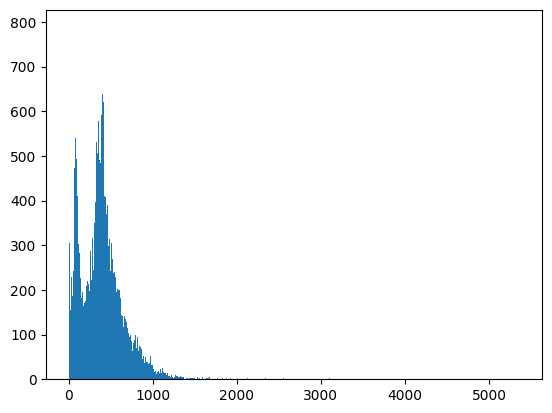

In [84]:
plt.hist([len(x) for x in X], bins =700)
plt.show()

In [85]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

680

In [86]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [87]:
# Example
len(X[101])

1000

In [88]:
# vocab size + 1 = there are many words are not present in tokens
# so this method will make them unknown words, create another sequence

vocab_size = len(tokenizer.word_index)+1
vocab =tokenizer.word_index

In [89]:
# Get the vectors
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix

In [90]:
embedding_vectors = get_weight_matrix(w2v_model)

In [91]:
embedding_vectors.shape

(187786, 100)

In [101]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable = False))
model.add(LSTM(units=128, unroll=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [102]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    18,778,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,778,600 (71.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 18,778,600 (71.63 MB)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [104]:
import tensorflow as tf
print("GPUs available:", tf.config.list_physical_devices('GPU'))


GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [105]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6


I0000 00:00:1736838714.056509   24609 service.cc:148] XLA service 0x79e984d27e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736838714.056532   24609 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-01-14 14:11:56.905854: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1736838733.342924   24609 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1736838889.032185   24609 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 bu

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_21070/4032389786.py", line 1, in <module>

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/duongnh/Software/miniconda3/envs/pyenv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_171676]

In [66]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

236/236 ━━━━━━━━━━━━━━━━━━━━ 128s 544ms/step


In [67]:
accuracy_score(y_test, y_pred)

0.9797028389493234

In [68]:
print(f"accuracy_score : {round(accuracy_score(y_test, y_pred), 4)*100}%")

accuracy_score : 97.97%


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3556
           1       0.99      0.97      0.98      3982

    accuracy                           0.98      7538
   macro avg       0.98      0.98      0.98      7538
weighted avg       0.98      0.98      0.98      7538



In [70]:
x = ['this is a news']

In [71]:
type(X_test)

numpy.ndarray

In [72]:
tokenizer.texts_to_matrix(x)[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
len(tokenizer.texts_to_matrix(x)[0])

187788

In [74]:
x = ['this is a news']

In [75]:
x = tokenizer.texts_to_sequences(x)
pad_sequences(x, maxlen=maxlen)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [76]:
x = ['this is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen) # Pad the sequence and store it back into x as a NumPy array
# Predict using the NumPy array
(model.predict(x) >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[0]])

In [77]:
if (model.predict(x) >=0.5).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
the input 'x' is fake news


In [78]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


array([[0.00231503]], dtype=float32)

In [79]:
# Input x as  x = ['''text''']

x = ['''The heart and neurological disorders have seen an uptick as a result of the post-COVID condition which reportedly began since the second wave of the virus, according to health experts.Speaking to ANI on Saturday, Dr Devi Prasad Shetty who is the Chairman of Narayana Health, and also an Executive Director, said that there was an increase in brain and heart-related issues during the second wave, however, in the present scenario, more data is required.

"COVID patients especially during the second wave, there was definitely a slight increase in the incidence of COVID patients developing clot forms, and clots in the brain or in the heart. But that pattern we saw only during the second wave. But we need to really get the data and then only I can say, whether it is really the case, but we did see a slightly higher incidence of brain stroke and heart problems," Dr Shetty said.
However, Dr Nitish Naik, Professor, Department of Cardiology, AIIMS, Delhi said that the study about the role of COVID in precipitating acute cardiac problems after recovery is still evolving. "All flu like illnesses have always been associated with increased risk of cardiac health-related issues. This has been known for many years and Covid is also behaving similarly. Our knowledge about the role of Covid 19 in precipitating acute cardiac problems after recovery is still evolving. While there are reports of heart involvement even after even mild COVID infections, the vast majority will recover without the need for any investigations or interventions," he said.

The expert explained that it can happen that some persons may experience persistent aches and pains, fatigue and palpitations during the recovery phase like after any viral illness.''']

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen) # Assign the output of pad_sequences back to x

(model.predict(x) >=0.5).astype(int)

if (model.predict(x) >=0.5).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
the input 'x' is fake news


In [83]:
# Input x as  x = ['''text''']

x = ['''For scientists and space agencies alike, it's especially exciting that MOXIE's promise holds strong, because proposed timelines for astronaut-laden Mars expeditions have looming deadlines for learning how to keep future red planet space explorers safe.

SpaceX CEO Elon Musk's goal of landing humans on Mars appears to be 2029, for instance, and NASA's own upcoming Artemis I moon mission is meant to pave the way for Martian excursions planned for the 2030s or 2040s. "To support a human mission to Mars, we have to bring a lot of stuff from Earth, like computers, spacesuits, and habitats," Jeffrey Hoffman, MOXIE deputy principal investigator and a professor at MIT, said in a press release. "But dumb old oxygen? If you can make it there, go for it -- you're way ahead of the game."

As it stands, MOXIE is super small (it's basically the size of a toaster), but this is potentially a good thing. It means that if scientists can somehow scale up the patterned cube's size, MOXIE could make far more than just six grams of oxygen per hour.

"We have learned a tremendous amount that will inform future systems at a larger scale," Hecht said.

Maybe one day, the researchers say, it could eventually produce oxygen at the rate of several hundred trees, thus sustaining astronauts once they arrive on Mars and fueling rockets that require the life-giving element to bring crew back to Earth.

"Astronauts who spend a year on the surface will maybe use one metric ton between them," Hecht said in a NASA press release last year. But, per the space agency, getting four astronauts off the Martian surface on a future mission would require approximately 15,000 pounds (7 metric tons) of rocket fuel and 55,000 pounds (25 metric tons) of oxygen. Bringing all that oxygen from Earth would be supercostly and inefficient.''']

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

(model.predict(x) >=0.5).astype(int)

if (model.predict(x) >=0.5).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
the input 'x' is real news


In [84]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


array([[0.9035318]], dtype=float32)

In [81]:
# Input x as  x = ['''text''']

x = ['''Is Google and YouTube in Hillary’s Purse?
Page: 1
Link:
After I posted my opening post (OP) on “Hillary Clinton Wants a Strong Russia. Wait, what did she say?”, mysteriously, my YouTube account gets wiped out. The next thing I notice is that the YouTube video I used in my OP (www.abovetopsecret.com...) suddenly won’t work. Has anyone else experienced this bizarre behavior before?
Is this what we are to expect if Hillary becomes POTUS? I went to the YouTube site, and the video is still available: www.youtube.com. I frankly don’t know what to think about this.
Reply to: Violater1
Yes, so is almost all the major media, magazines (that are left), most of Hollywood, GOP (kind of), and most of the Bushes. Who else?
Google is pro-Clinton, like Drudge is pro-Trump—without a doubt. Just about every news story under Google News is pro-Hillary and negative toward Trump. If I recall correctly, they even advised her campaign edits.
Edit on Thu, 27 Oct 2016 21:51:09 -05 by interupt42 because: (no reason given).
Link:
Is the dead link the same as the good one in the following reply? Same video ID? No errors?
Additional Comment:
I’m getting the feeling that gun control, Hillary as dictator, is not unlike Obamacare, forced on us. This is socialism, and since the corporations own the candidates, they want this. We have no choice.
They have the UN, plus a bunch of immigrants to join the UN forces to attack American freedom fighters. You may think I’m crazy, but they said I was crazy when I said 9/11 was a controlled demolition.
Look at the past, put common sense to it. The big ball is rolling. Too much money is at stake here. That’s the goal: the rich get richer. No more middle class or upper-middle class. Those making 1 or 2 million a year will be joining the crowd—unless you’re a member of the party.
I’ve known many immigrants who lived under communist rule, and all their stories are kind of the same:
All bad. No sense of identity.
''']

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

(model.predict(x) >=0.5).astype(int)

if (model.predict(x) >=0.5).astype(int)==0:
    print("the input 'x' is fake news")
else:
    print("the input 'x' is real news")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
the input 'x' is fake news


In [82]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


array([[0.03397676]], dtype=float32)

In [85]:
# Lưu mô hình
model.save('fake_news_detection_model.h5')



In [86]:
from google.colab import files
files.download('fake_news_detection_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# Lưu tokenizer
import json
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer.to_json())
